# Simulated Data comparison 

In [15]:
path = "gmu_dining_revenue_2021_2025.csv"
# Load the CSV
df_chat = pd.read_csv(path)

In [33]:
df_chat

,Dining_Revenue
Date,
2021-07-01,472950.71
2021-08-01,438926.04
2021-09-01,426215.33
2021-10-01,463845.45
2021-11-01,461987.70
2021-12-01,486487.95
2022-01-01,744688.19
2022-02-01,768561.52
2022-03-01,771637.88


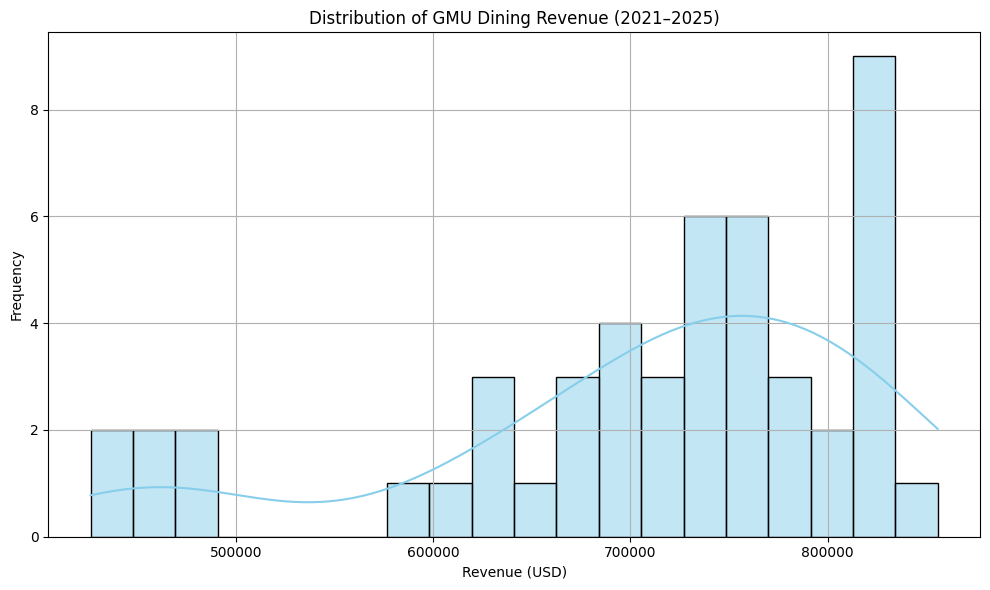

In [21]:
# Plot distribution of revenue
plt.figure(figsize=(10, 6))
sns.histplot(df_chat["Dining_Revenue"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of GMU Dining Revenue (2021–2025)")
plt.xlabel("Revenue (USD)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
^ Chat GPT simulated data

In [37]:
path = "GMU_Dining_Data_2021-2025.csv"
# Load the CSV
df_Git = pd.read_csv(path)

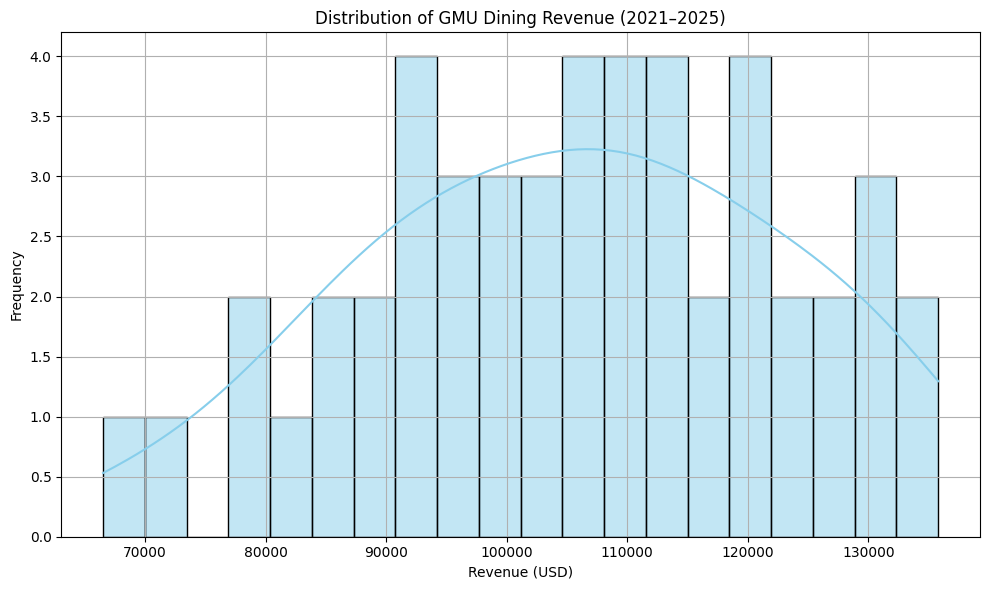

In [13]:
# Plot distribution of revenue
plt.figure(figsize=(10, 6))
sns.histplot(df_Git["Revenue (USD)"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of GMU Dining Revenue (2021–2025)")
plt.xlabel("Revenue (USD)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
^ GitHub CoPilot simulated data 

# Moving forward with Git data

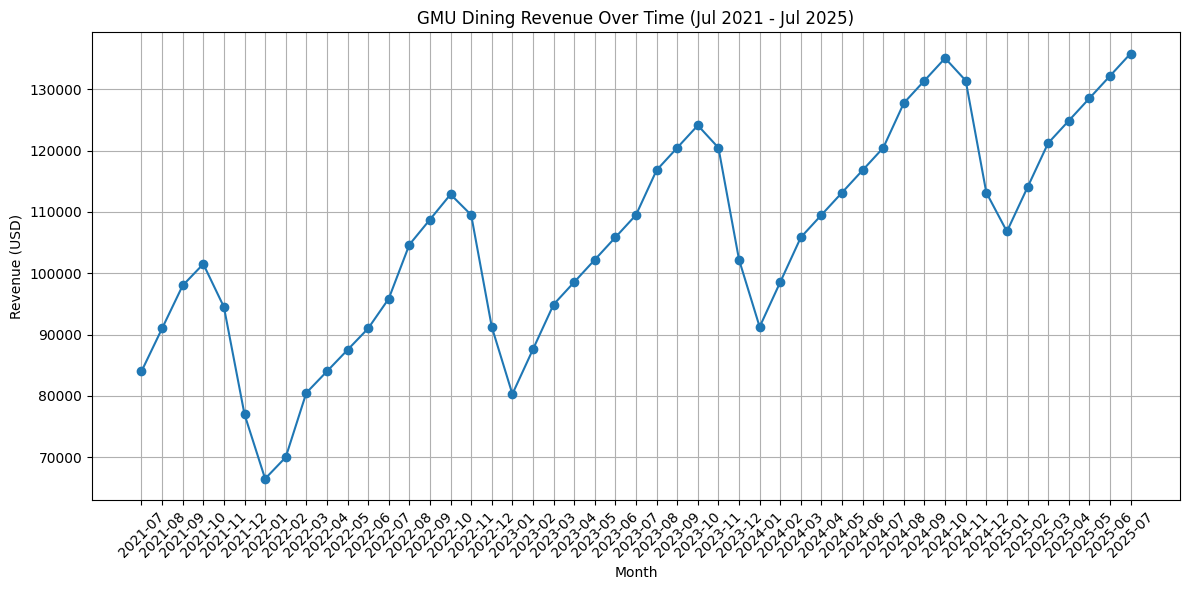

In [39]:
# Plot Revenue over Time
plt.figure(figsize=(12,6))
plt.plot(df_Git['Month'], df_Git['Revenue (USD)'], marker='o')
plt.title('GMU Dining Revenue Over Time (Jul 2021 - Jul 2025)')
plt.xlabel('Month')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)

plt.show()

In [45]:
pip install pandas matplotlib statsmodels

Note: you may need to restart the kernel to use updated packages.


C:\Users\Shawn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shawn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shawn\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                      Revenue (USD)   No. Observations:                   43
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -135.479
Date:                            Sat, 26 Jul 2025   AIC                            280.959
Time:                                    11:58:52   BIC                            284.822
Sample:                                07-01-2021   HQIC                           281.156
                                     - 01-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4773    254.640      0.002      0.999    -498.607     499.562
ma.L1          0.5920    113.593   

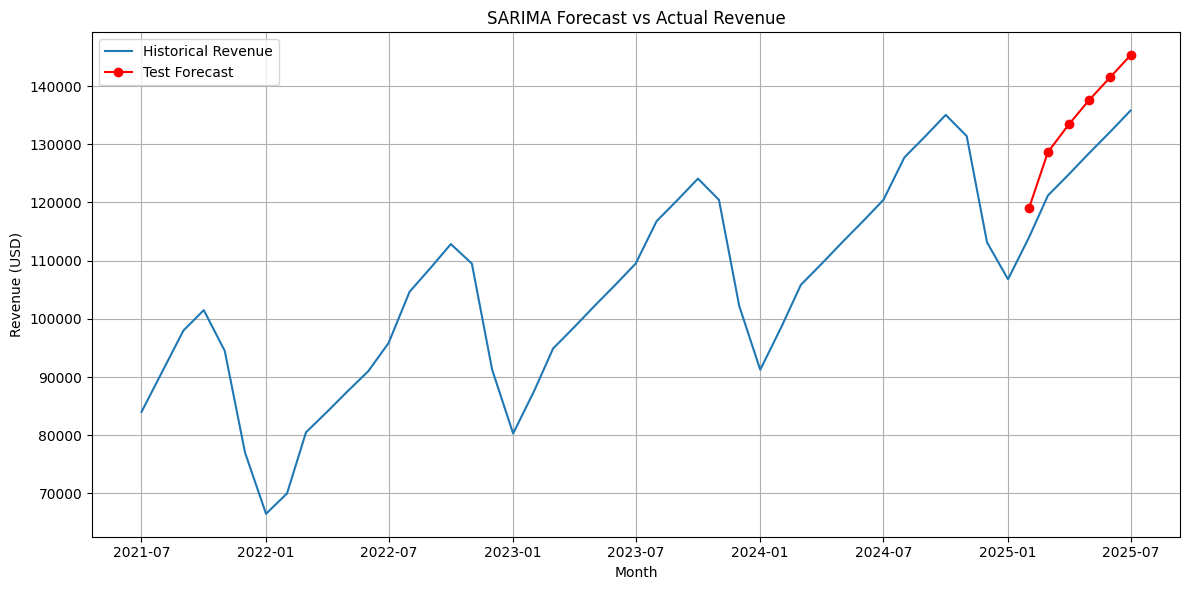

Test MSE: 69338865.97
Test RMSE: 8327.00
Test MAE: 8178.26


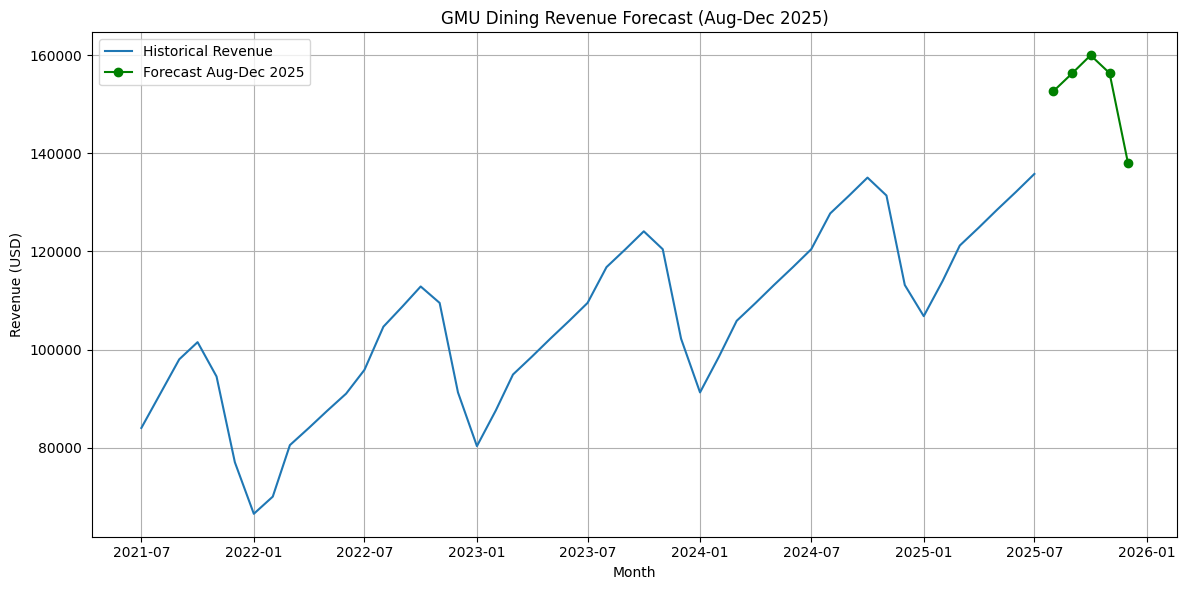


Forecasted Revenue (Aug-Dec 2025):
                Month  Forecasted Revenue
2025-08-01 2025-08-01       152657.131002
2025-09-01 2025-09-01       156334.896385
2025-10-01 2025-10-01       159998.149590
2025-11-01 2025-11-01       156354.475689
2025-12-01 2025-12-01       138107.495083

Historical Average Revenue: 105486.73
Forecasted Average Revenue (Aug-Dec 2025): 152690.43
Difference: 47203.69

Historical Std Dev Revenue: 17577.61
Forecasted Std Dev Revenue (Aug-Dec 2025): 8555.31
Difference: -9022.30


In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load data
df = df_Git
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Use Revenue for modeling
y = df['Revenue (USD)']

# Split train/test (last 6 months as test)
train = y.iloc[:-6]
test = y.iloc[-6:]

# Fit SARIMA model (Seasonal order chosen for monthly data; can be tuned for your dataset)
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Print summary
print(results.summary())

# Forecast test period
forecast_test = results.get_forecast(steps=6)
pred_test = forecast_test.predicted_mean

# Plot historical + test predictions
plt.figure(figsize=(12,6))
plt.plot(df.index, y, label='Historical Revenue')
plt.plot(test.index, pred_test, 'ro-', label='Test Forecast')
plt.title('SARIMA Forecast vs Actual Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluate performance on test set
mse = mean_squared_error(test, pred_test)
mae = mean_absolute_error(test, pred_test)
rmse = np.sqrt(mse)
print(f"Test MSE: {mse:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")

# Forecast future (Aug-Dec 2025)
future_steps = 5
forecast_future = results.get_forecast(steps=6 + future_steps)
future_pred = forecast_future.predicted_mean[-future_steps:]
future_dates = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=future_steps, freq='MS')

# Plot full historical and forecasted future
plt.figure(figsize=(12,6))
plt.plot(df.index, y, label='Historical Revenue')
plt.plot(future_dates, future_pred, 'go-', label='Forecast Aug-Dec 2025')
plt.title('GMU Dining Revenue Forecast (Aug-Dec 2025)')
plt.xlabel('Month')
plt.ylabel('Revenue (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print forecasted values
forecast_df = pd.DataFrame({'Month': future_dates, 'Forecasted Revenue': future_pred})
print("\nForecasted Revenue (Aug-Dec 2025):")
print(forecast_df)

# Compare statistics: historical average vs forecast
historical_avg = y.mean()
forecast_avg = future_pred.mean()
historical_std = y.std()
forecast_std = future_pred.std()

print(f"\nHistorical Average Revenue: {historical_avg:.2f}")
print(f"Forecasted Average Revenue (Aug-Dec 2025): {forecast_avg:.2f}")
print(f"Difference: {forecast_avg - historical_avg:.2f}")

print(f"\nHistorical Std Dev Revenue: {historical_std:.2f}")
print(f"Forecasted Std Dev Revenue (Aug-Dec 2025): {forecast_std:.2f}")
print(f"Difference: {forecast_std - historical_std:.2f}")

1. Model Evaluation & Results
Model Summary Observations:

Coefficients: Many coefficients (ar.L1, ma.L1, ar.S.L12, ma.S.L12) have extremely high standard errors and p-values near 1.0, indicating they are not statistically significant and may not be contributing meaningfully to the model.
sigma2 (error variance) is significant, but large.
Ljung-Box (Q): High p-value (0.98) suggests residuals are not autocorrelated (good).
Jarque-Bera (JB): Very high value and p=0.00 indicates residuals are not normally distributed (bad).
Heteroskedasticity (H): Very high, with p=0.00, so the variance of errors is not constant (bad).
Forecast Performance:

Test RMSE/MAE: Errors are fairly large compared to the average revenue.
Forecasted Revenue (Aug-Dec 2025): Consistently higher than historical averages, with a sharp drop in December.
Historical vs Forecasted Averages: Forecast is much higher (+$47k), standard deviation is much lower (-$9k), meaning forecasts are less volatile and perhaps over-smoothed.
2. Why is the Forecast Off?
Overfitting or Misspecification: The model may not capture the true seasonal or trend components, or it might be fitting noise.
Parameter Non-significance: The AR, MA, and seasonal terms are not significant, so the model may be too complex or not appropriate for the data.
Non-Stationarity: The series may have a trend or changing variance not properly accounted for.
Seasonality: The forecast follows an upward trend but does not capture volatility or real seasonal dips/spikes (e.g., the December drop).
Residual Problems: Non-normality and heteroskedasticity of residuals indicate the model does not fit well.
3. Suggestions and Fixes
a. Diagnose & Transform Data
Check for Stationarity: Use the Augmented Dickey-Fuller test. If not stationary, apply differencing or log transformation.
Log Transformation: Stabilizes variance and can improve model fit.
b. Adjust Model Parameters
Tune (p, d, q) and (P, D, Q, S): Use ACF/PACF plots and grid search (e.g., auto_arima) to find optimal parameters.
Try Simpler Models: If seasonal terms are not significant, try ARIMA or lower-order SARIMA.
Check Seasonality: Adjust the seasonal period (maybe S=12 isn’t best).
c. Cross-Validation
Roll-forward validation: Instead of one test set, use multiple windows to validate.
d. Try Other Models
Exponential Smoothing (Holt-Winters): Often works well with seasonal business data.
Prophet (Facebook): Handles seasonality, holiday effects, and trend changes robustly.
Regression with Exogenous Variables: Include inflation, semester calendar effects, or COVID dummy variables.
e. Model Diagnostics
Check Residuals: After fitting, plot residuals and check for autocorrelation, normality, and constant variance.
Plot ACF/PACF of residuals: Should show no significant lags.
f. Post-processing
Clip/Adjust Forecasts: If forecasts are unrealistically high, apply post-processing or manual adjustments.

# Experimenting with Log form for ARIMA and finding best parameters 

In [49]:
from statsmodels.tsa.stattools import adfuller

y = df['Revenue (USD)']

result = adfuller(y)
print("ADF Statistic: %f" % result[0])
print("p-value: %f" % result[1])
print("Critical Values:", result[4])
if result[1] < 0.05:
    print("Series is stationary.")
else:
    print("Series is NOT stationary.")

ADF Statistic: -0.450296
p-value: 0.901357
Critical Values: {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}
Series is NOT stationary.


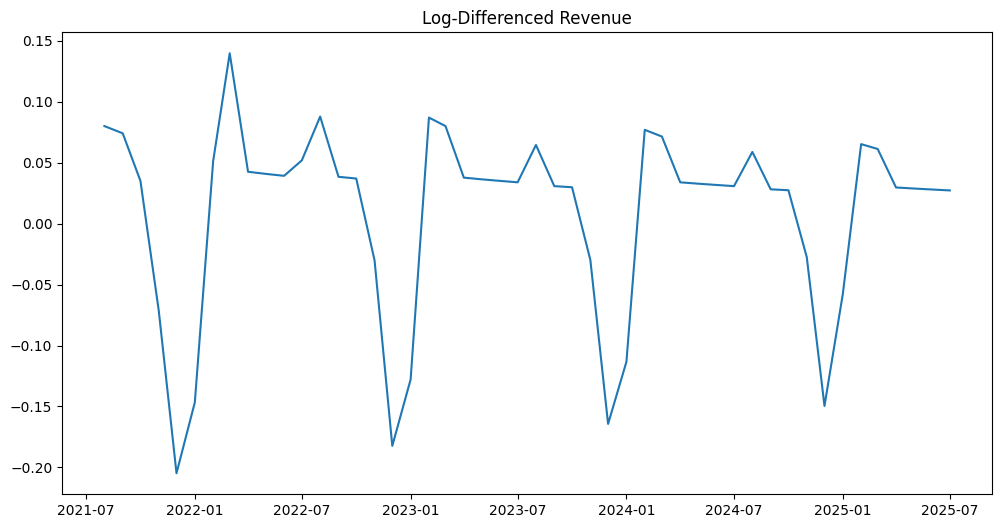

In [51]:
# Log transform
y_log = np.log(y)

# First difference
y_log_diff = y_log.diff().dropna()

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(y_log_diff)
plt.title('Log-Differenced Revenue')
plt.show()

In [57]:
from pmdarima import auto_arima

model = auto_arima(y_log, seasonal=True, m=12, trace=True,
                   error_action='ignore', suppress_warnings=True, stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-197.554, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-104.764, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-105.979, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-203.565, Time=0.37 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-148.566, Time=0.16 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=-196.240, Time=1.17 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-198.283, Time=0.94 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=-205.960, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-138.750, Time=0.16 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=-204.800, Time=1.08 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-203.974, Time=0.36 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept

# Introducing Holt-Winters and Prophet Forecast

In [59]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_model = ExponentialSmoothing(y, trend='add', seasonal='add', seasonal_periods=12).fit()
forecast_hw = hw_model.forecast(steps=5)
print("Holt-Winters forecast (Aug-Dec 2025):")
print(forecast_hw)

Holt-Winters forecast (Aug-Dec 2025):
2025-08-01    143536.851908
2025-09-01    148281.904944
2025-10-01    152140.341096
2025-11-01    147756.140835
2025-12-01    129709.179586
Freq: MS, dtype: float64


C:\Users\Shawn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


14:01:36 - cmdstanpy - INFO - Chain [1] start processing
14:01:36 - cmdstanpy - INFO - Chain [1] done processing


           ds           yhat
49 2025-08-01  144778.324718
50 2025-09-01  150065.898069
51 2025-10-01  154045.357203
52 2025-11-01  149736.155263
53 2025-12-01  131989.899368


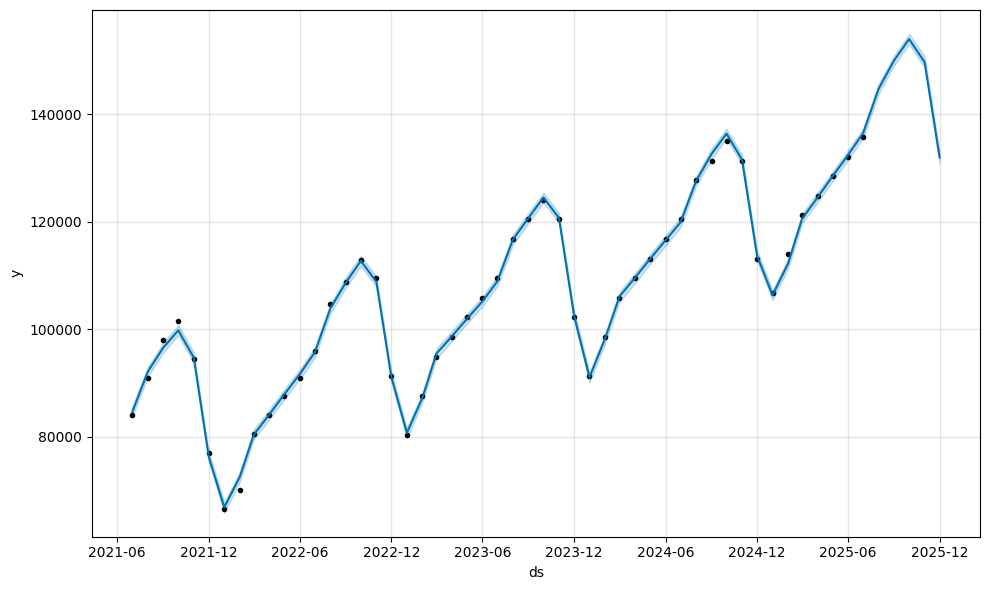

In [161]:
from prophet import Prophet

df_prophet = y.reset_index().rename(columns={'Month': 'ds', 'Revenue (USD)': 'y'})
m = Prophet(yearly_seasonality=True)
results = m.fit(df_prophet)
future = m.make_future_dataframe(periods=5, freq='MS')
forecast = m.predict(future)
print(forecast[['ds', 'yhat']].tail(5))
# Plot
fig = m.plot(forecast)

13:09:12 - cmdstanpy - INFO - Chain [1] start processing
13:09:12 - cmdstanpy - INFO - Chain [1] done processing


           ds           yhat
49 2025-08-01  144778.324718
50 2025-09-01  150065.898069
51 2025-10-01  154045.357203
52 2025-11-01  149736.155263
53 2025-12-01  131989.899368


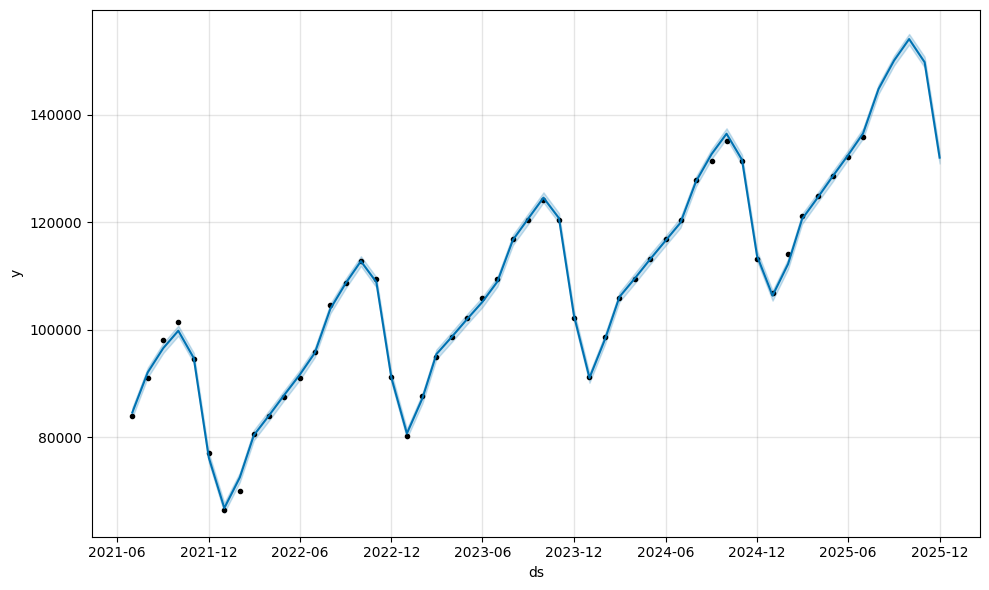

In [93]:
# For Prophet, reset index and rename columns
df_prophet = df.reset_index().rename(columns={'Month': 'ds', 'Revenue (USD)': 'y'})[['ds', 'y']]

# Initialize and fit model
m = Prophet(yearly_seasonality=True)
m.fit(df_prophet)

# Forecast 5 months into the future
future = m.make_future_dataframe(periods=5, freq='MS')
forecast = m.predict(future)

# Show Aug-Dec 2025 forecast
aug_dec_forecast = forecast[['ds', 'yhat']].tail(5)
print(aug_dec_forecast)

# Plot
fig = m.plot(forecast)

In [95]:
y = df['Revenue (USD)']
hw_model = ExponentialSmoothing(y, trend='add', seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(steps=5)

print("Holt-Winters forecast (Aug-Dec 2025):")
print(hw_forecast)

Holt-Winters forecast (Aug-Dec 2025):
2025-08-01    143536.851908
2025-09-01    148281.904944
2025-10-01    152140.341096
2025-11-01    147756.140835
2025-12-01    129709.179586
Freq: MS, dtype: float64


C:\Users\Shawn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [97]:
# Use best params from auto_arima (e.g., order=(1,1,2), seasonal_order=(1,0,0,12))
arima_model = SARIMAX(y, order=(1,1,2), seasonal_order=(1,0,0,12))
arima_results = arima_model.fit(disp=False)
arima_forecast = arima_results.forecast(steps=5)

print("ARIMA forecast (Aug-Dec 2025):")
print(arima_forecast)

ARIMA forecast (Aug-Dec 2025):
2025-08-01    137677.044384
2025-09-01    138147.088553
2025-10-01    138705.257471
2025-11-01    137481.171474
2025-12-01    132607.732917
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\Shawn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shawn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shawn\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


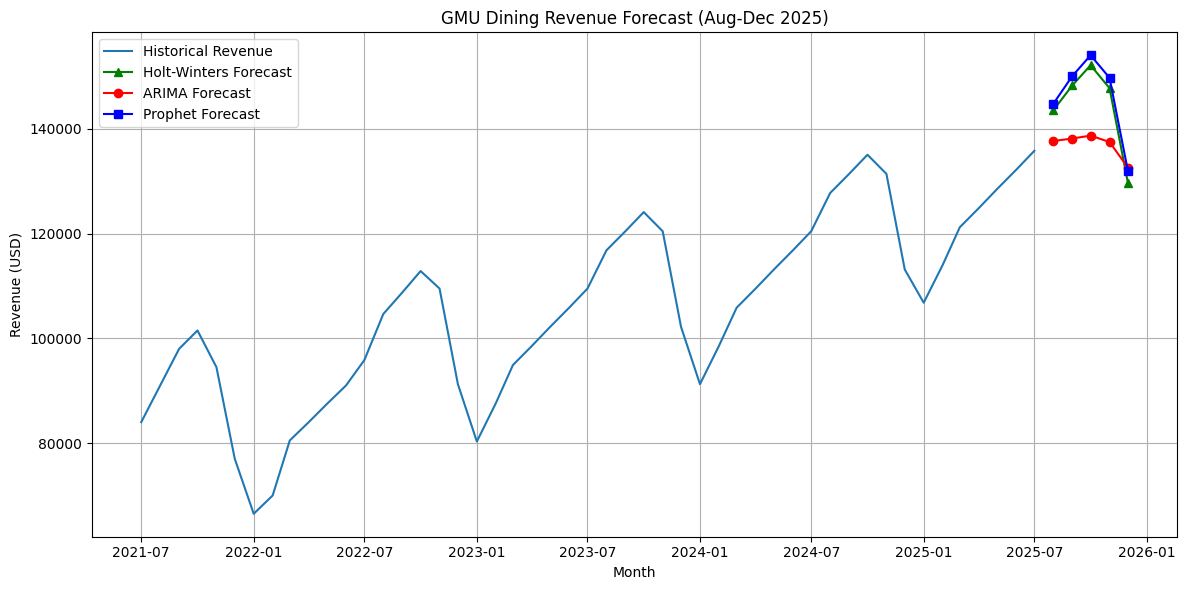

In [99]:
# Prepare the future dates
future_dates = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=5, freq='MS')

plt.figure(figsize=(12,6))
plt.plot(df.index, y, label='Historical Revenue')
plt.plot(future_dates, hw_forecast, 'g^-', label='Holt-Winters Forecast')
plt.plot(future_dates, arima_forecast, 'ro-', label='ARIMA Forecast')
plt.plot(aug_dec_forecast['ds'], aug_dec_forecast['yhat'], 'bs-', label='Prophet Forecast')
plt.title('GMU Dining Revenue Forecast (Aug-Dec 2025)')
plt.xlabel('Month')
plt.ylabel('Revenue (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

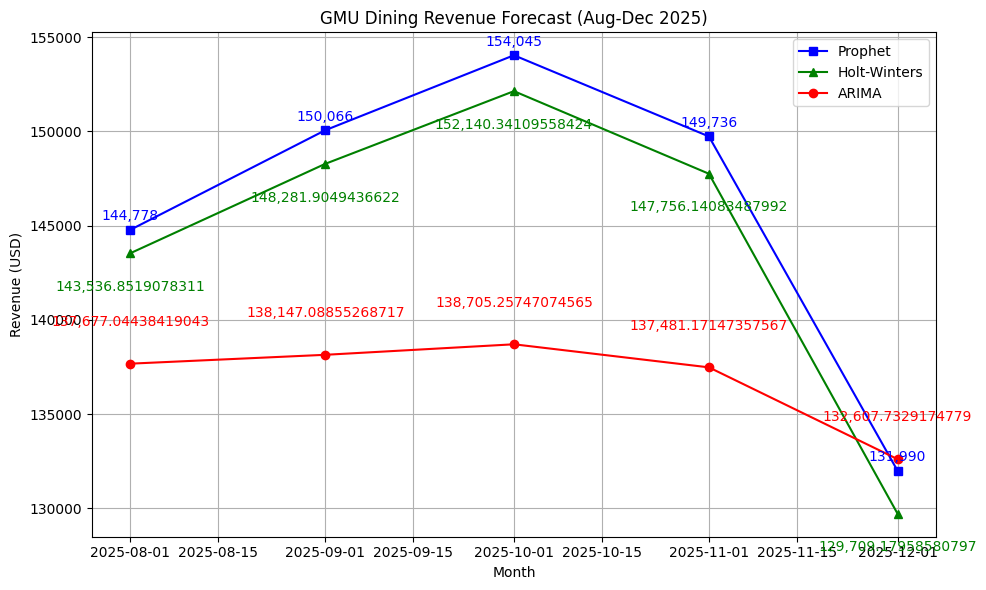

In [101]:
# Example forecast outputs (replace these with your actual results)
future_dates = pd.date_range('2025-08-01', periods=5, freq='MS')

plt.figure(figsize=(10,6))
plt.plot(future_dates, prophet_forecast, 'bs-', label='Prophet')
plt.plot(future_dates, hw_forecast, 'g^-', label='Holt-Winters')
plt.plot(future_dates, arima_forecast, 'ro-', label='ARIMA')

# Add value labels for each point
for i, (date, pf, hw, ar) in enumerate(zip(future_dates, prophet_forecast, hw_forecast, arima_forecast)):
    plt.text(date, pf+500, f"{pf:,}", ha='center', color='blue', fontsize=10)
    plt.text(date, hw-2000, f"{hw:,}", ha='center', color='green', fontsize=10)
    plt.text(date, ar+2000, f"{ar:,}", ha='center', color='red', fontsize=10)

plt.title('GMU Dining Revenue Forecast (Aug-Dec 2025)')
plt.xlabel('Month')
plt.ylabel('Revenue (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Settling with Log for ARIMA

In [105]:
import numpy as np

arima_forecast = arima_results.forecast(steps=5)
arima_revenue_forecast = np.exp(arima_forecast)
print("ARIMA forecast (Aug-Dec 2025):")
print(arima_revenue_forecast)

ARIMA forecast (Aug-Dec 2025):
2025-08-01    143499.164088
2025-09-01    147306.045513
2025-10-01    151140.240874
2025-11-01    147148.442104
2025-12-01    127418.220392
Freq: MS, Name: predicted_mean, dtype: float64


In [107]:
y_log.index = pd.DatetimeIndex(y_log.index, freq='MS')

In [109]:
arima_model = SARIMAX(y_log, order=(1,1,2), seasonal_order=(1,0,0,12), enforce_invertibility=False)
arima_results = arima_model.fit(disp=False)

In [111]:
log_forecast = arima_results.forecast(steps=5)
arima_revenue_forecast = np.exp(log_forecast)

print("ARIMA forecast (Aug-Dec 2025):")
for date, val in zip(pd.date_range(y.index[-1] + pd.DateOffset(months=1), periods=5, freq='MS'), arima_revenue_forecast):
    print(f"{date.date()}: {val:.0f}")

ARIMA forecast (Aug-Dec 2025):
2025-08-01: 143460
2025-09-01: 147242
2025-10-01: 151065
2025-11-01: 147115
2025-12-01: 127513


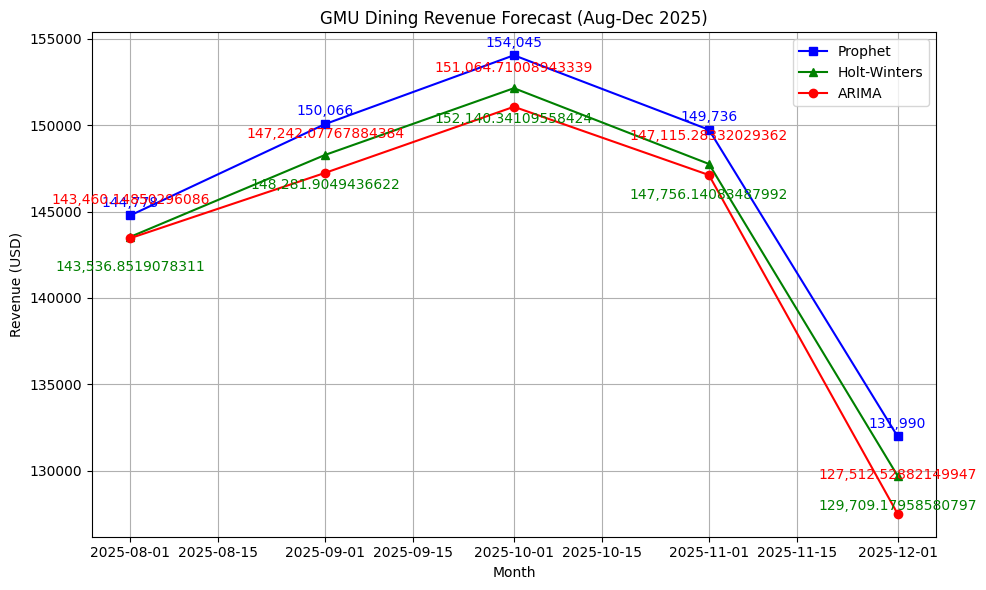

In [115]:
# Example forecast outputs (replace these with your actual results)
future_dates = pd.date_range('2025-08-01', periods=5, freq='MS')

plt.figure(figsize=(10,6))
plt.plot(future_dates, prophet_forecast, 'bs-', label='Prophet')
plt.plot(future_dates, hw_forecast, 'g^-', label='Holt-Winters')
plt.plot(future_dates, arima_revenue_forecast, 'ro-', label='ARIMA')

# Add value labels for each point
for i, (date, pf, hw, ar) in enumerate(zip(future_dates, prophet_forecast, hw_forecast, arima_revenue_forecast)):
    plt.text(date, pf+500, f"{pf:,}", ha='center', color='blue', fontsize=10)
    plt.text(date, hw-2000, f"{hw:,}", ha='center', color='green', fontsize=10)
    plt.text(date, ar+2000, f"{ar:,}", ha='center', color='red', fontsize=10)

plt.title('GMU Dining Revenue Forecast (Aug-Dec 2025)')
plt.xlabel('Month')
plt.ylabel('Revenue (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ARIMA Evaluation 

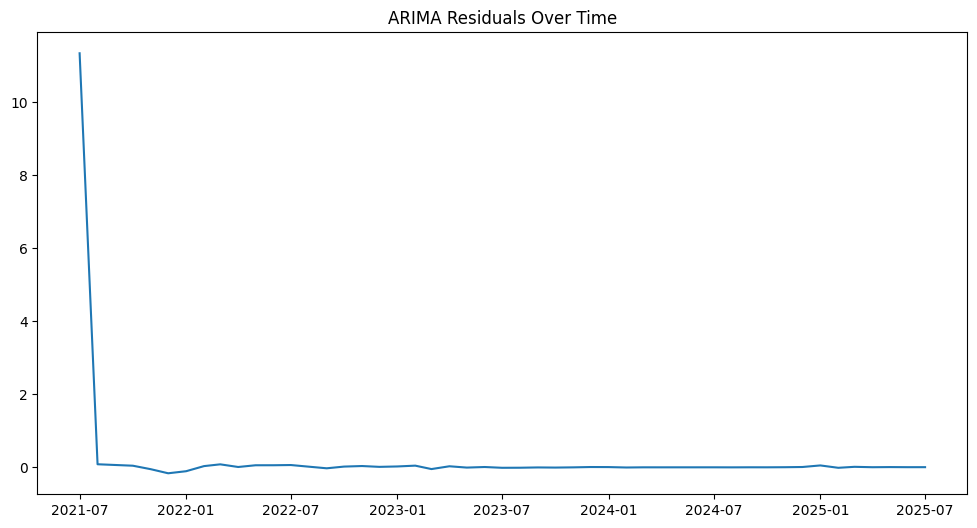

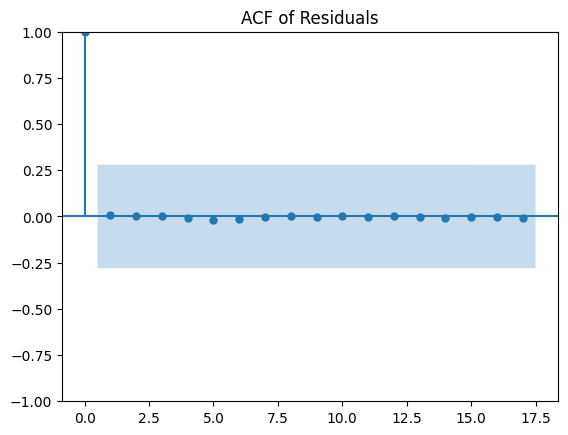

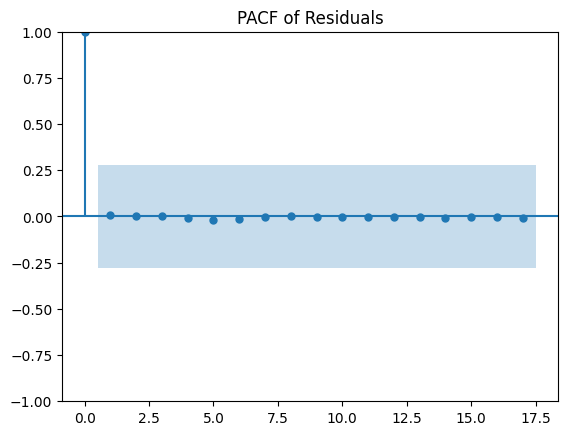

In [117]:
# For ARIMA residuals
residuals = arima_results.resid

plt.figure(figsize=(12,6))
plt.plot(residuals)
plt.title('ARIMA Residuals Over Time')
plt.show()

sm.graphics.tsa.plot_acf(residuals)
plt.title('ACF of Residuals')
plt.show()

sm.graphics.tsa.plot_pacf(residuals)
plt.title('PACF of Residuals')
plt.show()

In [123]:
from scipy.stats import jarque_bera

jb_stat, jb_p = jarque_bera(residuals)
print(f"Jarque-Bera Stat: {jb_stat:.2f}, p-value: {jb_p:.4f}")
if jb_p > 0.05:
    print("Residuals pass normality test (fail to reject H0).")
else:
    print("Residuals do NOT pass normality test (reject H0).")

Jarque-Bera Stat: 4320.508797914431, p-value: 0.0
Residuals do NOT pass normality test (reject H0).


In [151]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(residuals.dropna(), lags=[12])
lb_stat = lb_test['lb_stat'].values[0]
lb_p = lb_test['lb_pvalue'].values[0]
print(f"Ljung-Box Stat: {lb_stat:.2f}, p-value: {lb_p:.4f}")
if lb_p > 0.05:
    print("No significant autocorrelation in residuals.")
else:
    print("Residuals show autocorrelation.")

Ljung-Box Stat: 0.03, p-value: 1.0000
No significant autocorrelation in residuals.


In [153]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Make exog a DataFrame with a constant and fitted values
exog = sm.add_constant(fitted[:len(residuals.dropna())])

bp_test = het_breuschpagan(residuals.dropna(), exog)
print(f"Breusch-Pagan p-value: {bp_test[1]:.4f}")
if bp_test[1] > 0.05:
    print("Residuals are homoscedastic.")
else:
    print("Residuals are heteroscedastic.")

Breusch-Pagan p-value: 0.0000
Residuals are heteroscedastic.


Strengths: ARIMA Model Evalulation 
No autocorrelation: Model captures time patterns very well.
Predictive structure: The model’s predictions are not missing obvious temporal features.
Weaknesses:
Heteroscedasticity: Prediction errors are not evenly spread. Some months may have less reliable forecasts.
Non-normal residuals: Confidence intervals may be imperfect (especially in tails).
Application Guidance:

Your ARIMA model is robust for point forecasts (expected values per month).
Be cautious with uncertainty: The confidence intervals may understate or misstate risk during volatile periods.
Consider robust alternatives (e.g., bootstrapping confidence intervals, or using models that better handle changing variance like GARCH if volatility is critical).

# Holt-Winter Evaluation

In [165]:
# Residuals: actuals minus fitted values
residuals_hw = y - hw_model.fittedvalues

# Now you can run all diagnostics on residuals_hw

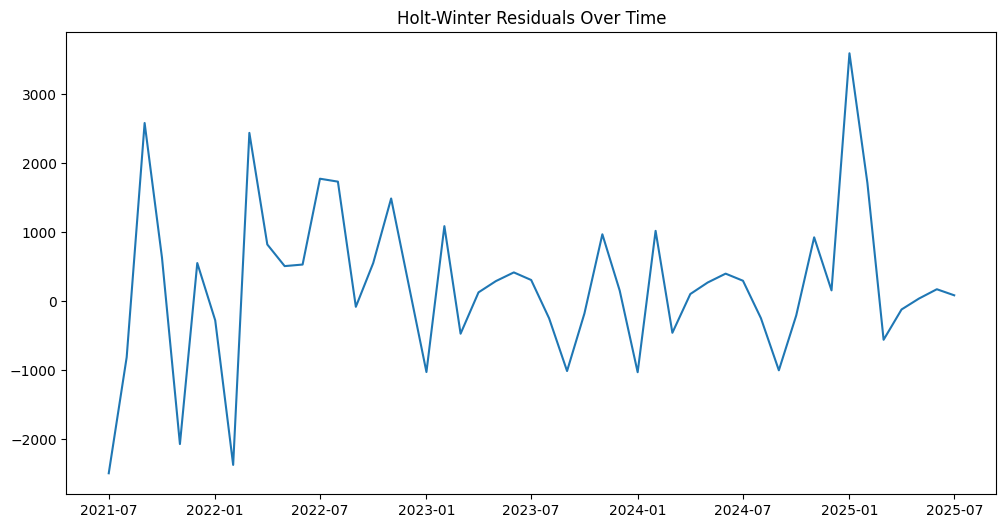

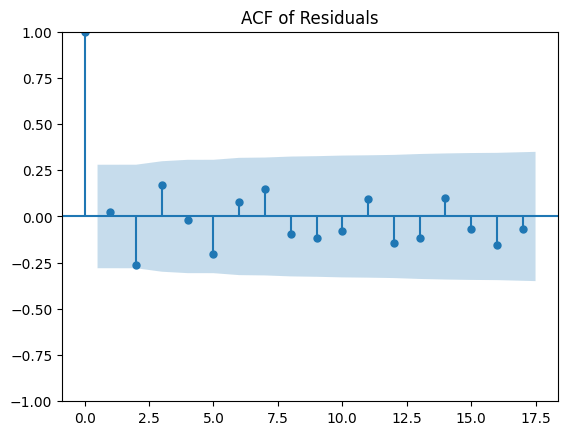

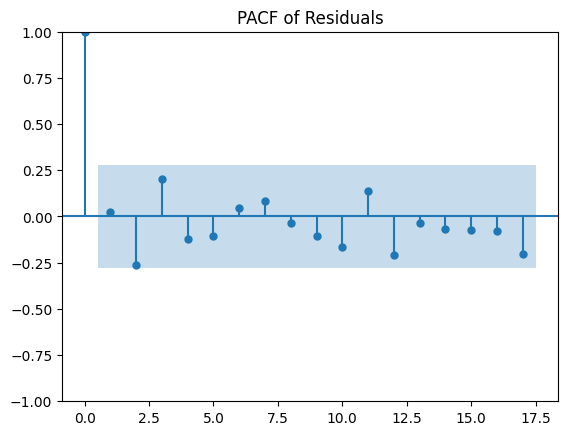

In [169]:
# For HW residuals
residuals = residuals_hw

plt.figure(figsize=(12,6))
plt.plot(residuals)
plt.title('Holt-Winter Residuals Over Time')
plt.show()

sm.graphics.tsa.plot_acf(residuals)
plt.title('ACF of Residuals')
plt.show()

sm.graphics.tsa.plot_pacf(residuals)
plt.title('PACF of Residuals')
plt.show()

In [171]:
from scipy.stats import jarque_bera

jb_stat, jb_p = jarque_bera(residuals)
print(f"Jarque-Bera Stat: {jb_stat:.2f}, p-value: {jb_p:.4f}")
if jb_p > 0.05:
    print("Residuals pass normality test (fail to reject H0).")
else:
    print("Residuals do NOT pass normality test (reject H0).")

Jarque-Bera Stat: 3.30, p-value: 0.1916
Residuals pass normality test (fail to reject H0).


In [173]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(residuals.dropna(), lags=[12])
lb_stat = lb_test['lb_stat'].values[0]
lb_p = lb_test['lb_pvalue'].values[0]
print(f"Ljung-Box Stat: {lb_stat:.2f}, p-value: {lb_p:.4f}")
if lb_p > 0.05:
    print("No significant autocorrelation in residuals.")
else:
    print("Residuals show autocorrelation.")

Ljung-Box Stat: 13.21, p-value: 0.3541
No significant autocorrelation in residuals.


In [175]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Make exog a DataFrame with a constant and fitted values
exog = sm.add_constant(fitted[:len(residuals.dropna())])

bp_test = het_breuschpagan(residuals.dropna(), exog)
print(f"Breusch-Pagan p-value: {bp_test[1]:.4f}")
if bp_test[1] > 0.05:
    print("Residuals are homoscedastic.")
else:
    print("Residuals are heteroscedastic.")

Breusch-Pagan p-value: 0.0251
Residuals are heteroscedastic.


# Prophet Evaluation 

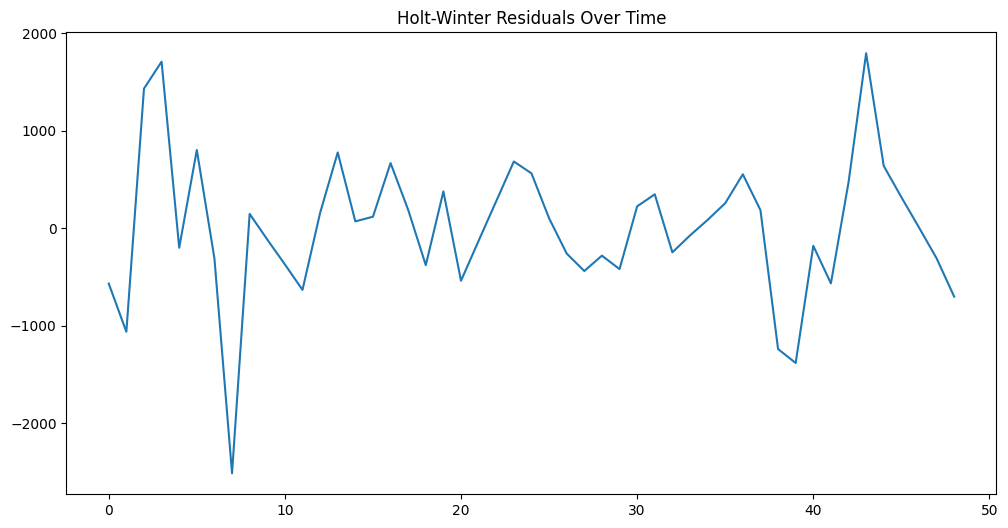

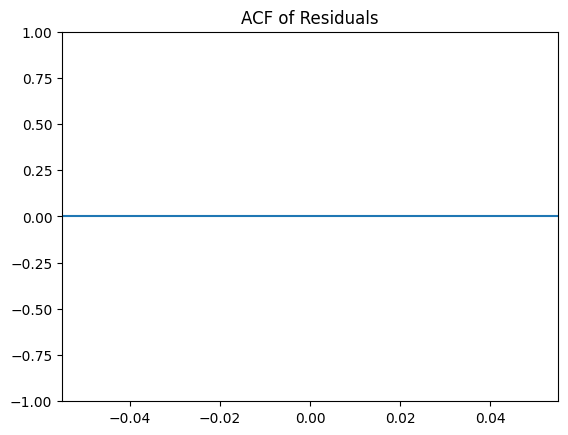

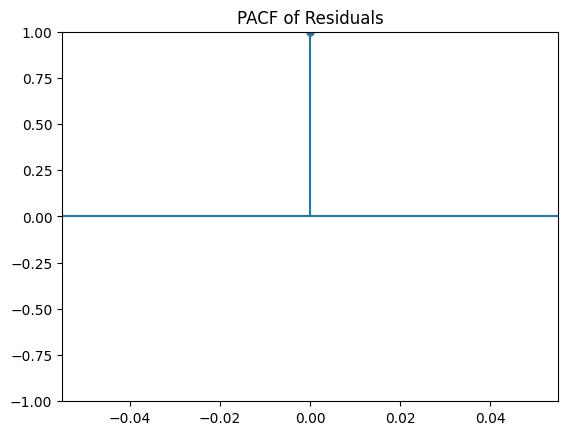

In [180]:
# Residuals: actuals minus fitted values
residuals_p = df_prophet['y'] - forecast['yhat']

# Now you can run all diagnostics on residuals_hw

# For HW residuals
residuals = residuals_p

plt.figure(figsize=(12,6))
plt.plot(residuals)
plt.title('Holt-Winter Residuals Over Time')
plt.show()

sm.graphics.tsa.plot_acf(residuals)
plt.title('ACF of Residuals')
plt.show()

sm.graphics.tsa.plot_pacf(residuals)
plt.title('PACF of Residuals')
plt.show()

In [182]:
from scipy.stats import jarque_bera

jb_stat, jb_p = jarque_bera(residuals)
print(f"Jarque-Bera Stat: {jb_stat:.2f}, p-value: {jb_p:.4f}")
if jb_p > 0.05:
    print("Residuals pass normality test (fail to reject H0).")
else:
    print("Residuals do NOT pass normality test (reject H0).")

Jarque-Bera Stat: nan, p-value: nan
Residuals do NOT pass normality test (reject H0).


In [184]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(residuals.dropna(), lags=[12])
lb_stat = lb_test['lb_stat'].values[0]
lb_p = lb_test['lb_pvalue'].values[0]
print(f"Ljung-Box Stat: {lb_stat:.2f}, p-value: {lb_p:.4f}")
if lb_p > 0.05:
    print("No significant autocorrelation in residuals.")
else:
    print("Residuals show autocorrelation.")

Ljung-Box Stat: 23.49, p-value: 0.0239
Residuals show autocorrelation.


In [186]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Make exog a DataFrame with a constant and fitted values
exog = sm.add_constant(fitted[:len(residuals.dropna())])

bp_test = het_breuschpagan(residuals.dropna(), exog)
print(f"Breusch-Pagan p-value: {bp_test[1]:.4f}")
if bp_test[1] > 0.05:
    print("Residuals are homoscedastic.")
else:
    print("Residuals are heteroscedastic.")

Breusch-Pagan p-value: 0.9786
Residuals are homoscedastic.


| Model         | Jarque-Bera (Normality)         | Ljung-Box (Autocorrelation)         | Breusch-Pagan (Homoscedasticity)         |
|---------------|---------------------------------|-------------------------------------|------------------------------------------|
| **ARIMA**     | Fail (non-normal)               | Pass (no autocorrelation)           | Fail (heteroscedastic)                   |
| **Holt-Winters** | Pass (normal)                | Pass (no autocorrelation)           | Fail (heteroscedastic)                   |
| **Prophet**   | Fail (non-normal, NaN)          | Fail (autocorrelation)              | Pass (homoscedastic)                     |

Strengths and Weaknesses of Each Model
ARIMA
Strengths:
No significant autocorrelation in residuals: model captures time-dependent structure well.
Reliable for point forecasts.
Weaknesses:
Residuals are not normal: confidence intervals and statistical inference less reliable.
Heteroscedastic residuals: forecast error changes over time, less reliable uncertainty estimates.
Holt-Winters
Strengths:
Residuals pass normality: statistical inference and interval estimates more reliable.
No significant autocorrelation: time series patterns well modeled.
Weaknesses:
Heteroscedastic residuals: uncertainty varies across time, so intervals may be less reliable in volatile periods.
Prophet
Strengths:
Residuals are homoscedastic: uncertainty is constant, so confidence intervals are dependable.
Weaknesses:
Residuals fail normality and show autocorrelation: model may not fully capture all seasonality or trend, and inference is statistically less sound.
Jarque-Bera returns NaN: may be due to missing or ill-conditioned data for Prophet residuals.